In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mrr_data = pd.read_csv('data/Customer_MRR_Data.csv')
revenue_data = pd.read_csv('data/Customer_Revenue_Data.csv')
age_data = pd.read_csv('data/Customer_Age_Data.csv')

# change column name on age data
age_data.rename(columns={'CRM ID':'Customer ID','Customer Age (Months)':'Age'}, inplace=True)


# merge all datasets
df = pd.merge(mrr_data, revenue_data, on='Customer ID')
df = pd.merge(df, age_data, on='Customer ID')

df['Customer ID'] = df['Customer ID'].apply(lambda x: x.split('CRM-')[1])
df['MRR'] = df['MRR'].replace('[\$,]', '', regex=True).astype(float)
df['Total Revenue'] = df['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)

df.head()

<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_d/9nvwwyt97xs156nmz906c5pw0000gn/T/ipykernel_15573/2044262280.py:14: SyntaxWarning: invalid escape sequence '\$'
  df['MRR'] = df['MRR'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/_d/9nvwwyt97xs156nmz906c5pw0000gn/T/ipykernel_15573/2044262280.py:15: SyntaxWarning: invalid escape sequence '\$'
  df['Total Revenue'] = df['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)


,Customer ID,MRR,Total Revenue,Age
0,673950,4950.0,402101.0,46
1,683100,600.0,199.0,46
2,150500,17650.0,175293442.0,72
3,701050,1350.0,2037.0,42
4,730800,2125.0,0.0,45


In [3]:
# analyze data
print(df.shape)
print(df.info())
print(df.describe())

(896, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    896 non-null    object 
 1   MRR            896 non-null    float64
 2   Total Revenue  896 non-null    float64
 3   Age            896 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 28.1+ KB
None
                MRR  Total Revenue         Age
count    896.000000   8.960000e+02  896.000000
mean    4314.159598   1.266134e+07   28.215402
std     5788.431676   1.222254e+08   18.384273
min       26.000000   0.000000e+00    1.000000
25%     1254.750000   8.562500e+02   14.000000
50%     2750.000000   6.398800e+04   24.000000
75%     5216.500000   4.661252e+05   39.250000
max    62732.000000   2.789805e+09   72.000000


In [4]:
print(df.isnull().sum())

Customer ID      0
MRR              0
Total Revenue    0
Age              0
dtype: int64


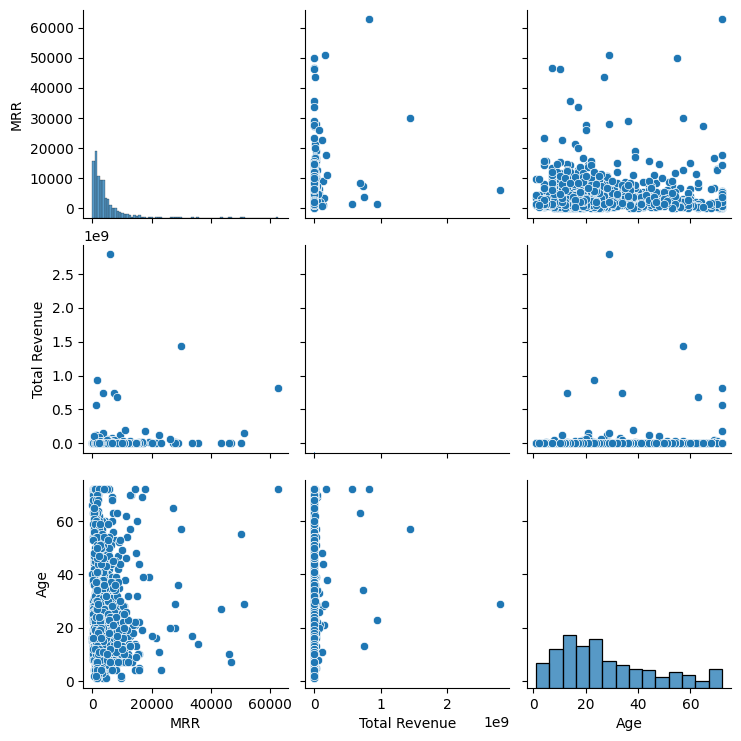

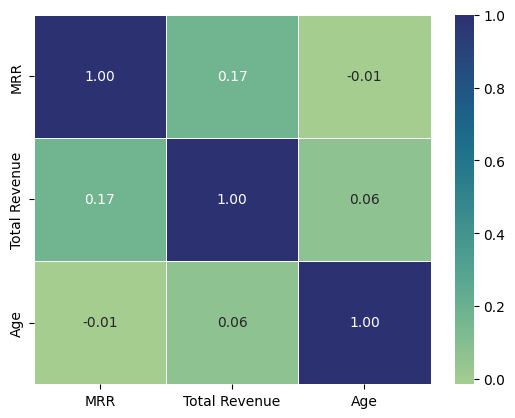

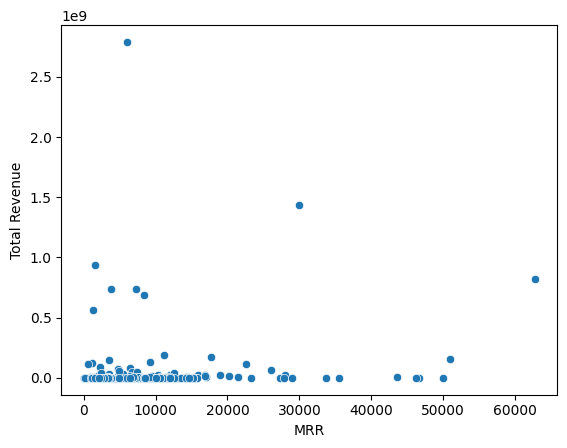

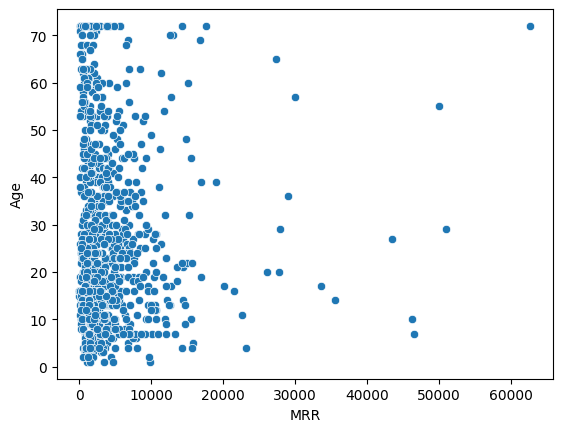

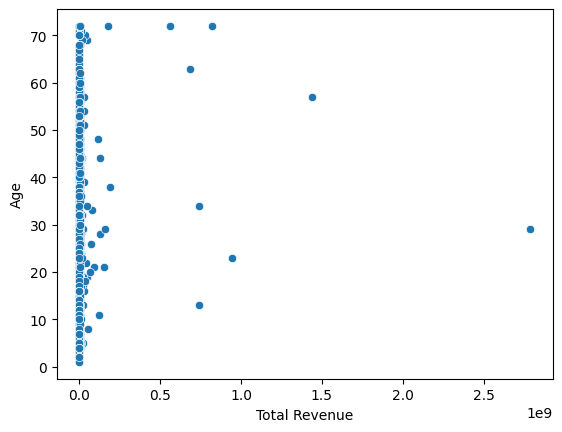

In [5]:
# get numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])

# visualize numerical data
sns.pairplot(df_num)
plt.show()

# correlation matrix
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot=True,cmap='crest', fmt='.2f', linewidths=.5)
plt.show()

# visualize MRR and Total Revenue
sns.scatterplot(x='MRR', y='Total Revenue', data=df)
plt.show()

# visualize MRR and Age
sns.scatterplot(x='MRR', y='Age', data=df)
plt.show()

# visualize Total Revenue and Age
sns.scatterplot(x='Total Revenue', y='Age', data=df)
plt.show()
